# INJURY PREDICITON
Roger Duran

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import  accuracy_score, recall_score, precision_score, classification_report
from sklearn.metrics import confusion_matrix

In [5]:
# Baixem el dataset
df_injury = pd.read_csv('injury_data.csv')

df_injury.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.251933,175.732429,1,0.457929,5,0
1,37,70.996271,174.581650,0,0.226522,6,1
2,32,80.093781,186.329618,0,0.613970,2,1
3,28,87.473271,175.504240,1,0.252858,4,1
4,25,84.659220,190.175012,0,0.577632,1,1


In [6]:
df_injury['Player_Weight'] = df_injury['Player_Weight'].round(1)
df_injury['Player_Height'] = df_injury['Player_Height'].round(1)
df_injury['Training_Intensity'] = df_injury['Training_Intensity'].round(1)

df_injury.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury
0,24,66.3,175.7,1,0.5,5,0
1,37,71.0,174.6,0,0.2,6,1
2,32,80.1,186.3,0,0.6,2,1
3,28,87.5,175.5,1,0.3,4,1
4,25,84.7,190.2,0,0.6,1,1


In [7]:
df_injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_Age            1000 non-null   int64  
 1   Player_Weight         1000 non-null   float64
 2   Player_Height         1000 non-null   float64
 3   Previous_Injuries     1000 non-null   int64  
 4   Training_Intensity    1000 non-null   float64
 5   Recovery_Time         1000 non-null   int64  
 6   Likelihood_of_Injury  1000 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 54.8 KB


In [8]:
# AFEGIREM EL BMI, Index de Massa corporal per una millor relació de parametres
df_injury['BMI'] = df_injury['Player_Weight'] / ((df_injury['Player_Height'] / 100) ** 2)
limits=(0, 18.5, 24.9, 29.9, 34.9, 39.9, 100)
categories_BMI=['Infrapes', 'Normal', 'Sobrepes', 'Obes', 'Molt_Obes', 'Extremadament_Obes']
df_injury['BMI_tipo'] = pd.cut(df_injury['BMI'], bins=limits, labels=categories_BMI, right=False)

df_injury.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,BMI,BMI_tipo
0,24,66.3,175.7,1,0.5,5,0,21.476821,Normal
1,37,71.0,174.6,0,0.2,6,1,23.290020,Normal
2,32,80.1,186.3,0,0.6,2,1,23.078459,Normal
3,28,87.5,175.5,1,0.3,4,1,28.408860,Sobrepes
4,25,84.7,190.2,0,0.6,1,1,23.413287,Normal


Podem obsevar que columnes com el Edat, Pes, l'Altura i la intensitat de entrenament tenen molts valors unics. Una de les opcions que tenim seria agrupar aluns valors.

### ANALISI EXPLORATORIA
Analitzarem les columnes del dataset

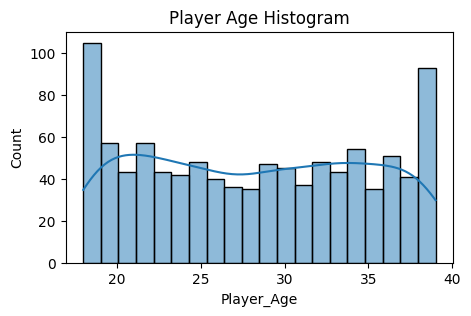

In [9]:
# Player Age histrograma
plt.figure(figsize=(5, 3))

sns.histplot(data=df_injury, x='Player_Age', bins=20, kde=True)
plt.title('Player Age Histogram')
plt.show()

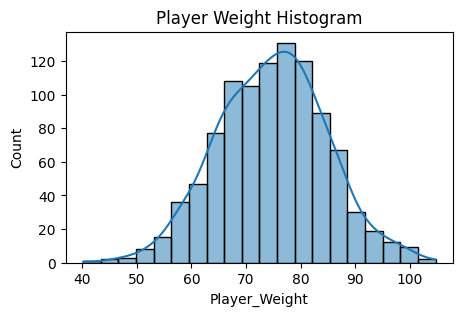

In [10]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df_injury, x='Player_Weight', bins=20, kde=True)
plt.title('Player Weight Histogram')
plt.show()

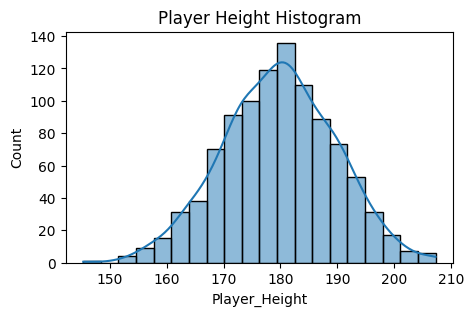

In [11]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df_injury, x='Player_Height', bins=20, kde=True)
plt.title('Player Height Histogram')
plt.show()

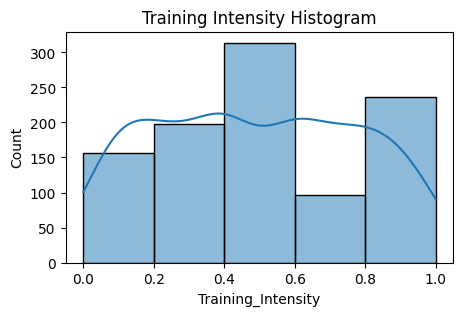

In [12]:
plt.figure(figsize=(5, 3))
sns.histplot(data=df_injury, x='Training_Intensity', bins=5, kde=True)
plt.title('Training Intensity Histogram')
plt.show()

### PROCESSAMENT DE LES DADES
Pasem les variables categòriques a numèriques binaries

In [13]:
columnes_categoriques = ['BMI_tipo']
df_categories = df_injury[columnes_categoriques]

encoder= OneHotEncoder()
encoded_data = encoder.fit_transform(df_categories)

noms_BMI = encoder.get_feature_names_out(columnes_categoriques)
df_categories_encoded = pd.DataFrame(encoded_data.toarray(), columns=noms_BMI)

print(df_categories_encoded.head())

df_injury_final = pd.concat([df_injury, df_categories_encoded], axis=1)
df_injury_final.drop(['BMI_tipo'], axis=1, inplace=True)

df_injury_final.head(5)

   BMI_tipo_Infrapes  BMI_tipo_Molt_Obes  BMI_tipo_Normal  BMI_tipo_Obes  \
0                0.0                 0.0              1.0            0.0   
1                0.0                 0.0              1.0            0.0   
2                0.0                 0.0              1.0            0.0   
3                0.0                 0.0              0.0            0.0   
4                0.0                 0.0              1.0            0.0   

   BMI_tipo_Sobrepes  
0                0.0  
1                0.0  
2                0.0  
3                1.0  
4                0.0  


,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,BMI,BMI_tipo_Infrapes,BMI_tipo_Molt_Obes,BMI_tipo_Normal,BMI_tipo_Obes,BMI_tipo_Sobrepes
0,24,66.3,175.7,1,0.5,5,0,21.476821,0.0,0.0,1.0,0.0,0.0
1,37,71.0,174.6,0,0.2,6,1,23.290020,0.0,0.0,1.0,0.0,0.0
2,32,80.1,186.3,0,0.6,2,1,23.078459,0.0,0.0,1.0,0.0,0.0
3,28,87.5,175.5,1,0.3,4,1,28.408860,0.0,0.0,0.0,0.0,1.0
4,25,84.7,190.2,0,0.6,1,1,23.413287,0.0,0.0,1.0,0.0,0.0


### ESTANDARITZACIÓ DE LES DADES


In [14]:
df_injury_final.drop(['BMI'], axis=1, inplace=True)

df_injury_final.head()

,Player_Age,Player_Weight,Player_Height,Previous_Injuries,Training_Intensity,Recovery_Time,Likelihood_of_Injury,BMI_tipo_Infrapes,BMI_tipo_Molt_Obes,BMI_tipo_Normal,BMI_tipo_Obes,BMI_tipo_Sobrepes
0,24,66.3,175.7,1,0.5,5,0,0.0,0.0,1.0,0.0,0.0
1,37,71.0,174.6,0,0.2,6,1,0.0,0.0,1.0,0.0,0.0
2,32,80.1,186.3,0,0.6,2,1,0.0,0.0,1.0,0.0,0.0
3,28,87.5,175.5,1,0.3,4,1,0.0,0.0,0.0,0.0,1.0
4,25,84.7,190.2,0,0.6,1,1,0.0,0.0,1.0,0.0,0.0


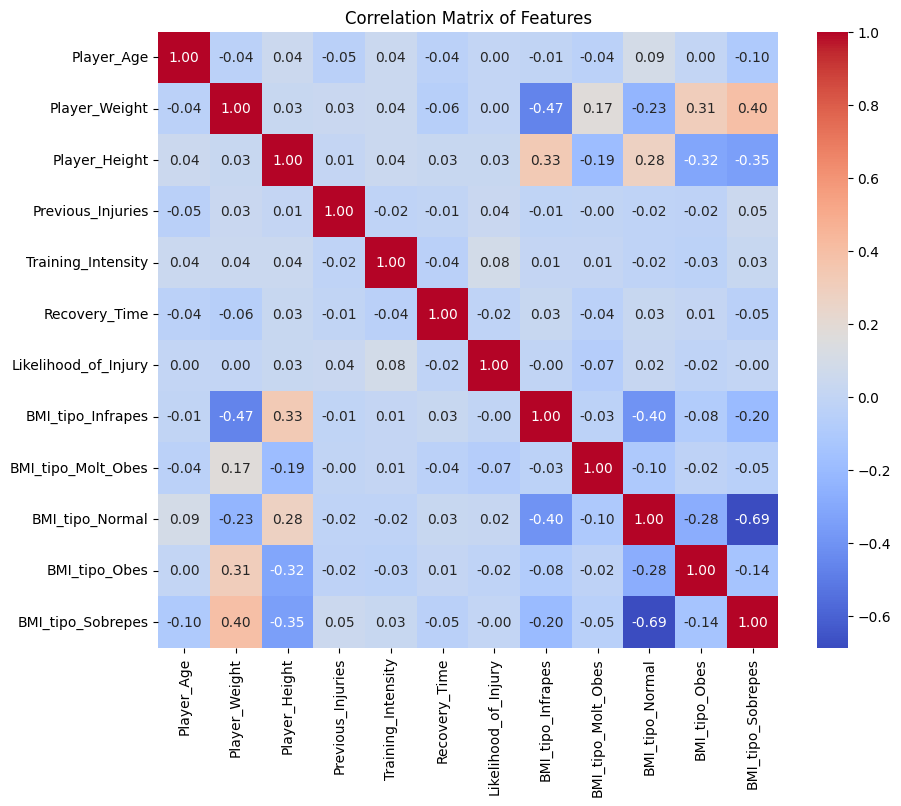

In [15]:
# Calculate the correlation between numerical features and the target variable
correlation_matrix = df_injury_final.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:

X=df_injury_final.drop('Likelihood_of_Injury', axis=1)
y=df_injury_final['Likelihood_of_Injury']

print(X.head())
print(y.head())

# Definim les dedes de test i entrenament, he observat que amb el 90% d'entrenament obtenim millores % que amb el 80%
# Al ser un dataset petit ens podem beneficiar mes del 90% de train
# Potser amb un cross validation podriem millorar el model (a mirar)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

X_train_final = pd.DataFrame(X_train_scaler, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaler, columns=X.columns)
print(X_train_final.head())


   Player_Age  Player_Weight  Player_Height  Previous_Injuries  \
0          24           66.3          175.7                  1   
1          37           71.0          174.6                  0   
2          32           80.1          186.3                  0   
3          28           87.5          175.5                  1   
4          25           84.7          190.2                  0   

   Training_Intensity  Recovery_Time  BMI_tipo_Infrapes  BMI_tipo_Molt_Obes  \
0                 0.5              5                0.0                 0.0   
1                 0.2              6                0.0                 0.0   
2                 0.6              2                0.0                 0.0   
3                 0.3              4                0.0                 0.0   
4                 0.6              1                0.0                 0.0   

   BMI_tipo_Normal  BMI_tipo_Obes  BMI_tipo_Sobrepes  
0              1.0            0.0                0.0  
1              1.0

In [23]:
#Generem un diccionari de models
models = {
    'NuSVC': NuSVC(probability=True),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'Neural Network (MLPClassifier)': MLPClassifier(),
    'SVM (SVC)': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_final, y_train)
    y_pred = model.predict(X_test_final)
    sensibilitat = recall_score(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precisio = precision_score(y_test, y_pred)
  
    print(f'Model: {model_name}')
    print(f'Exactitud: {exactitud}')
    print(f'Sensibilitat: {sensibilitat}')
    print(f'Precisió: {precisio}')
    print('\n================================')

Model: NuSVC
Exactitud: 0.55
Sensibilitat: 0.5932203389830508
Precisió: 0.625

Model: ExtraTreeClassifier
Exactitud: 0.59
Sensibilitat: 0.576271186440678
Precisió: 0.68



c:\Users\roger\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model: Neural Network (MLPClassifier)
Exactitud: 0.57
Sensibilitat: 0.5084745762711864
Precisió: 0.6818181818181818

Model: SVM (SVC)
Exactitud: 0.59
Sensibilitat: 0.559322033898305
Precisió: 0.6875

Model: Decision Tree
Exactitud: 0.48
Sensibilitat: 0.4915254237288136
Precisió: 0.5686274509803921

Model: Random Forest
Exactitud: 0.58
Sensibilitat: 0.5423728813559322
Precisió: 0.6808510638297872



### TRIA DEL MODEL


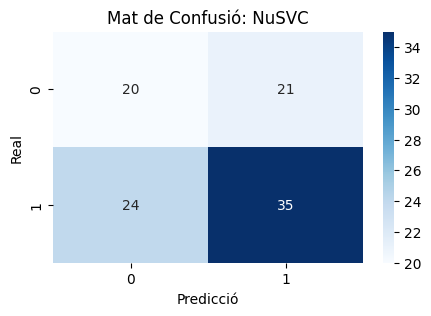

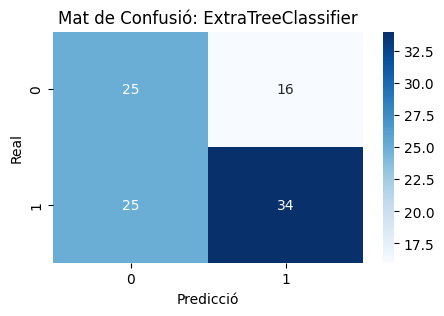

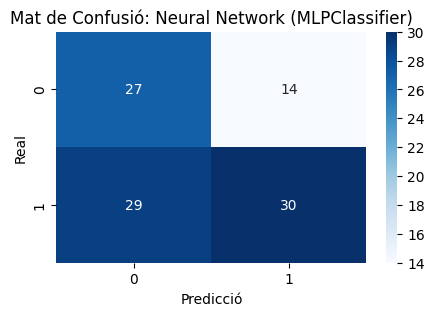

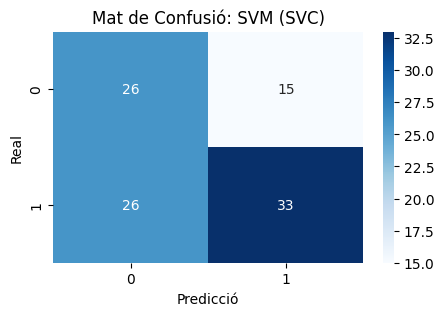

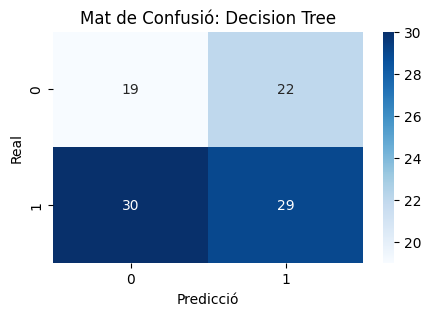

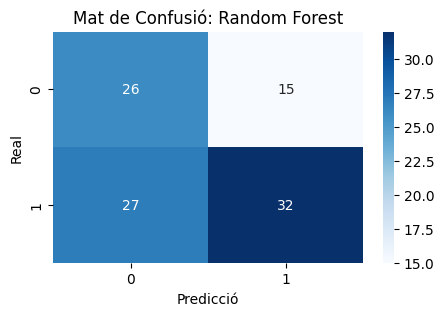

In [24]:
for model_name, model in models.items():
    y_pred = model.predict(X_test_final)
    matriu_confusio=confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 3))
    sns.heatmap(matriu_confusio, annot=True, fmt='d', cmap='Blues')
    set_title = plt.title(f'Mat de Confusió: {model_name}')
    plt.xlabel('Predicció')
    plt.ylabel('Real')



plt.show()

# El millor model es el NuSVC amb un accuracy de 0.71 i una sensibilitat de 0.71 també.